In [2]:
# 导入模块
%matplotlib inline
import pandas as pd
import csv
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
style.use('ggplot')   
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
# csv数据处理
f = open('汇总数据.csv', mode='r', encoding='utf-8')
csv_reader = csv.reader(f)
rows = [i for i in csv_reader]
# 此处是标题，一共17个变量
headers = rows[0]
# 此处是存放float类型数据的字典
total_datas = {}
for i in range(len(headers)):
    if headers[i] not in total_datas:
        total_datas[headers[i]] = []
# 需要将time后的日期修改成标准形式，如Q1代表2月，Q2代表5月，Q3代表8月，Q4代表11月
date_change = {
    'Q1': '02',
    'Q2': '05',
    'Q3': '08',
    'Q4': '11'
}
for row in rows[1:]:
    date1 = row[0].split('-')[-1]
    # 标准形式的日期数据
    date_now = row[0].split('-')[0] + '-' + date_change[date1]
    total_datas[headers[0]].append(date_now)
    for i in range(1, len(headers)):
        # 有一部分数据是,分开的，需要处理
        if len(row[i]) >= 1:
            if ',' in row[i]:
                row[i] = row[i].split(',')[0] + row[i].split(',')[-1]
                total_datas[headers[i]].append(float(row[i]))
            else:
                total_datas[headers[i]].append(float(row[i]))
        else:
            total_datas[headers[i]].append(row[i])
# 将处理后的数据导出为另一个csv文件
f = open('处理后csv文件.csv', mode='w', encoding='utf-8-sig', newline="")
csv_write = csv.writer(f)
csv_write.writerow(headers)
values = []
for key, value in total_datas.items():
    values.append(value)
for j in range(len(values[0])):
    row_value = []
    for i in range(len(values)):
        row_value.append(values[i][j])
    csv_write.writerow(row_value)
f.close()

In [4]:
stockFile = '处理后csv文件.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])#将索引index设置为时间，parse_dates对日期格式处理为标准格式。
stock.head(10)

,GDP,investment R&D,unemployment rate,Total Energy CO2 Emissions,energy consumption,employment rate,health care CPI,consumer price index,exchange rate,Tariff,Education construction expenditure\n,tax,interest rate,funds ratefederal fund rate\n,Exports of goods and services,Imports of goods and services/million
time,,,,,,,,,,,,,,,,
2000-02-01,10002.9,75.760,4.033333,504.444333,520.999000,64.600000,256.866667,256.600000,0.963467,19.952,5171.666667,133987.0,8.686667,5.676667,260656.0,348139.0
2000-05-01,10247.7,76.836,3.933333,463.530667,544.575333,64.533333,259.566667,259.300000,0.934267,21.960,6270.666667,162988.0,9.246667,6.273333,269952.0,358120.0
2000-08-01,10319.8,77.944,4.000000,486.933333,491.525333,64.200000,262.366667,262.300000,0.899667,21.576,7211.000000,126853.0,9.500000,6.520000,277204.0,371719.0
2000-11-01,10439.0,79.124,3.900000,500.609000,477.645000,64.300000,264.200000,264.800000,0.888033,21.004,5967.666667,128084.0,9.500000,6.473333,275151.0,374672.0
2001-02-01,10472.9,80.352,4.233333,515.780667,435.897000,64.333333,268.666667,268.300000,0.912567,21.864,5241.333333,137649.0,8.623333,5.593333,271148.0,368461.0
2001-05-01,10597.8,81.720,4.400000,457.782667,436.891000,63.833333,271.566667,271.366667,0.861333,20.584,6390.000000,164910.0,7.340000,4.326667,262318.0,349085.0
2001-08-01,10596.3,83.224,4.833333,479.304667,426.610667,63.466667,274.166667,274.100000,0.900100,19.900,7322.000000,127473.0,6.566667,3.496667,246592.0,334805.0
2001-11-01,10660.3,84.880,5.500000,468.694667,420.590667,63.033333,276.633333,277.300000,0.895733,20.196,5818.333333,126664.0,5.156667,2.133333,235308.0,323387.0
2002-02-01,10789.0,87.768,5.700000,493.806000,453.430333,62.833333,280.866667,280.533333,0.866300,18.857,5128.333333,129268.0,4.750000,1.733333,238868.0,332208.0


time
2000-03-31    10002.9
2000-06-30    10247.7
2000-09-30    10319.8
2000-12-31    10439.0
2001-03-31    10472.9
               ...   
2019-12-31    21747.4
2020-03-31    21561.1
2020-06-30    19520.1
2020-09-30    21157.1
2020-12-31        NaN
Freq: Q-DEC, Name: GDP, Length: 84, dtype: float64

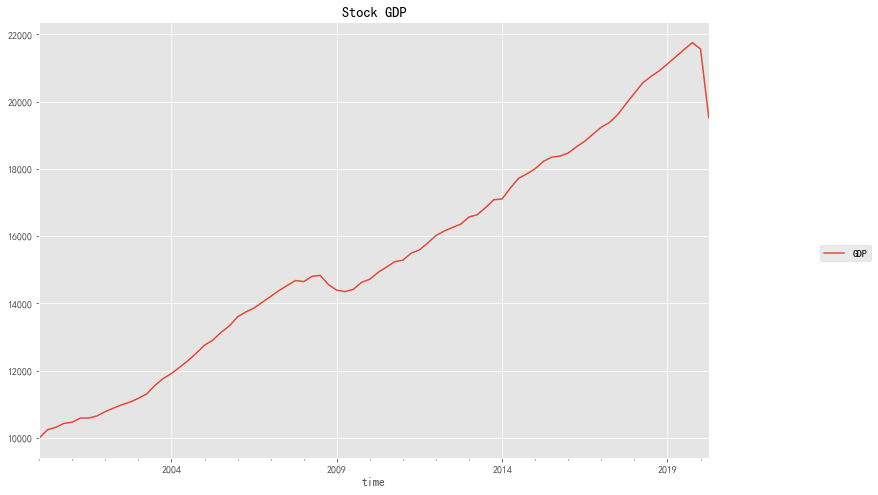

In [5]:
# Q代表按照季度来，这么一看其实time当时不用转换
stock_week = stock['GDP'].resample('Q').mean()
stock_train = stock_week['2000-02':'2020-08']

stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock GDP")
sns.despine()
stock_week

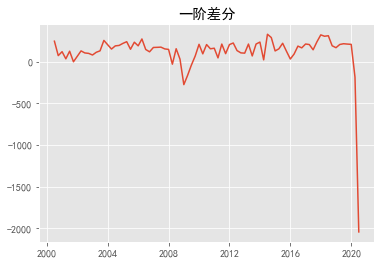

In [6]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
 
plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

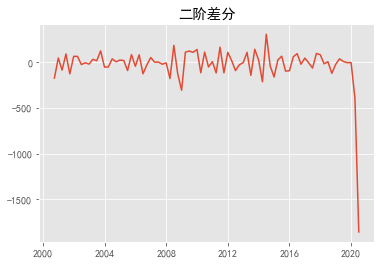

In [7]:
stock_second_diff = stock_diff.diff()
stock_second_diff = stock_second_diff.dropna()

plt.figure()
plt.plot(stock_second_diff)
plt.title('二阶差分')
plt.show()

d:\python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


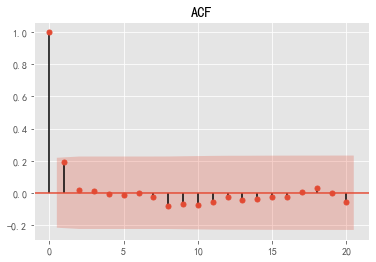

In [8]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

d:\python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


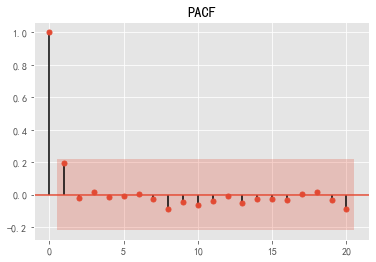

In [9]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [10]:
# 根据上图选择p、d、q指标
model = ARIMA(stock_train, order=(1, 1, 1),freq='Q')
result = model.fit()
#print(result.summary())#统计出ARIMA模型的指标

In [11]:
pred = result.predict('2019-09','2024-12',dynamic=True, typ='levels')#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
print(pred)

2019-09-30    21512.513318
2019-12-31    21656.075275
2020-03-31    21768.598893
2020-06-30    21856.452990
2020-09-30    21924.699551
2020-12-31    21977.361883
2021-03-31    22017.637745
2021-06-30    22048.068740
2021-09-30    22070.674954
2021-12-31    22087.061970
2022-03-31    22098.505917
2022-06-30    22106.021072
2022-09-30    22110.413591
2022-12-31    22112.324215
2023-03-31    22112.262209
2023-06-30    22110.632339
2023-09-30    22107.756319
2023-12-31    22103.889848
2024-03-31    22099.236160
2024-06-30    22093.956785
2024-09-30    22088.180108
2024-12-31    22082.008172
Freq: Q-DEC, dtype: float64


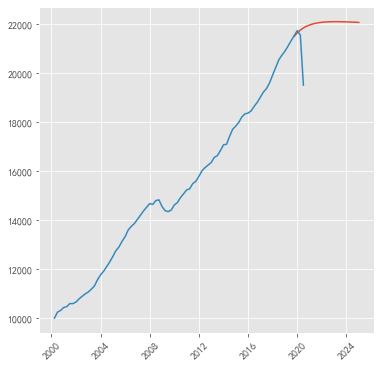

In [12]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)#[<matplotlib.lines.Line2D at 0x28025665278>]

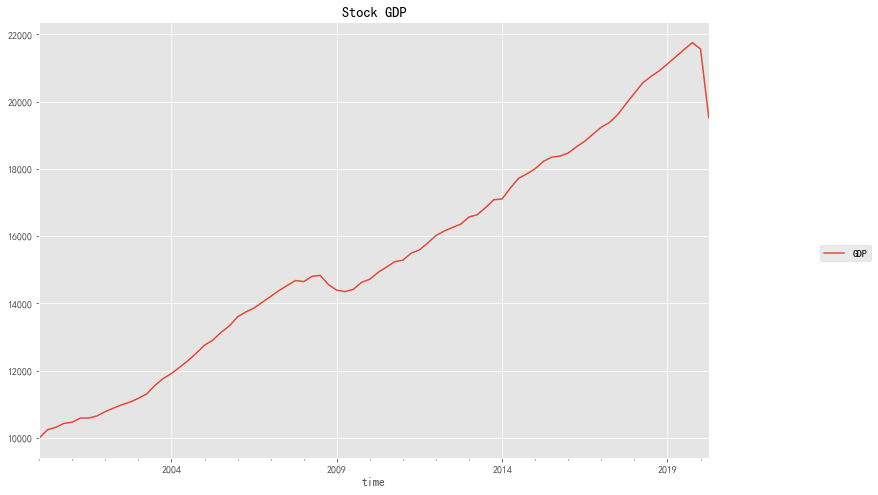

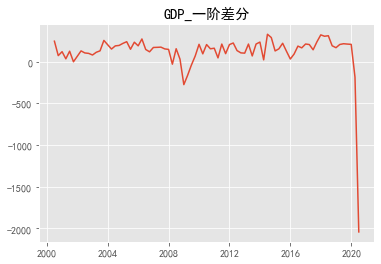

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    20855.524454
2019-03-31    20943.617656
2019-06-30    21012.054260
2019-09-30    21064.867641
2019-12-31    21105.263557
2020-03-31    21135.789971
2020-06-30    21158.472027
2020-09-30    21174.919321
2020-12-31    21186.411178
2021-03-31    21193.964412
2021-06-30    21198.387198
2021-09-30    21200.321877
2021-12-31    21200.278990
2022-03-31    21198.664316
2022-06-30    21195.800374
2022-09-30    21191.943503
2022-12-31    21187.297445
2023-03-31    21182.024134
2023-06-30    21176.252278
2023-09-30    21170.084173
2023-12-31    21163.601127
2024-03-31    21156.867764
2024-06-30    21149.935446
2024-09-30    21142.844997
2024-12-31    21135.628864
Freq: Q-DEC, dtype: float64


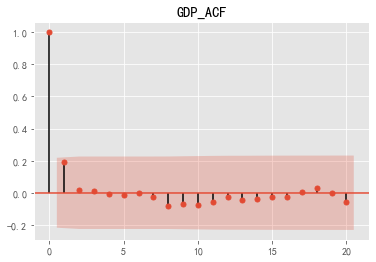

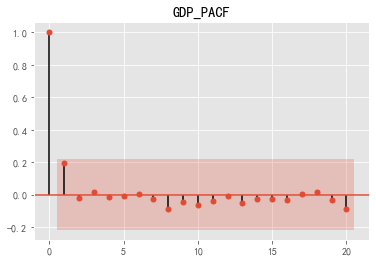

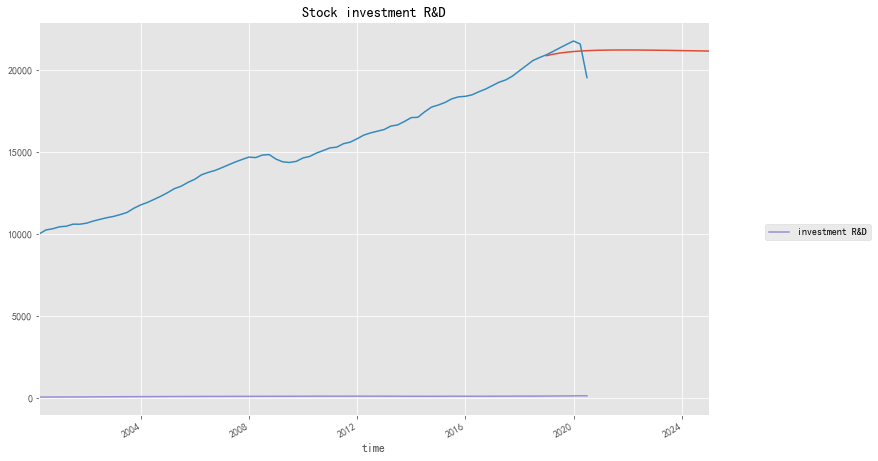

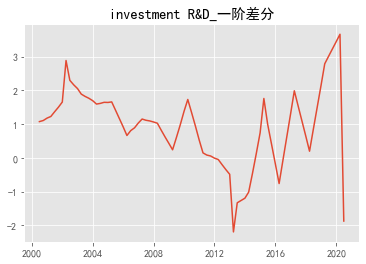

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    137.539249
2019-03-31    138.793165
2019-06-30    139.920067
2019-09-30    140.957009
2019-12-31    141.930237
2020-03-31    142.858338
2020-06-30    143.754477
2020-09-30    144.627980
2020-12-31    145.485450
2021-03-31    146.331564
2021-06-30    147.169636
2021-09-30    148.002011
2021-12-31    148.830352
2022-03-31    149.655836
2022-06-30    150.479296
2022-09-30    151.301322
2022-12-31    152.122334
2023-03-31    152.942626
2023-06-30    153.762409
2023-09-30    154.581831
2023-12-31    155.400998
2024-03-31    156.219984
2024-06-30    157.038842
2024-09-30    157.857609
2024-12-31    158.676311
Freq: Q-DEC, dtype: float64


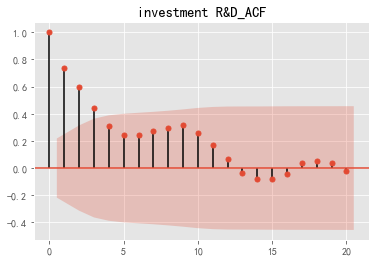

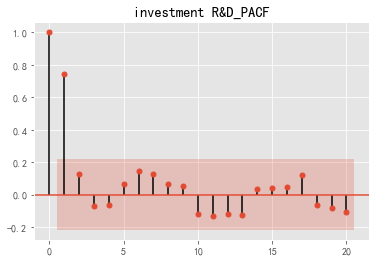

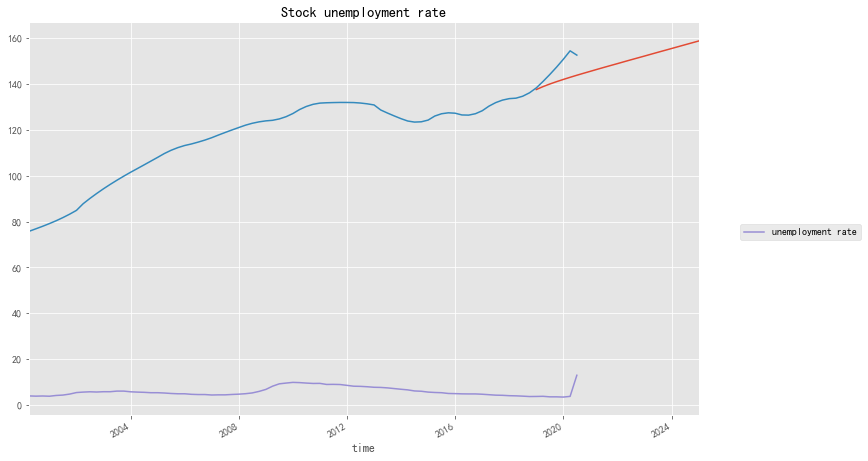

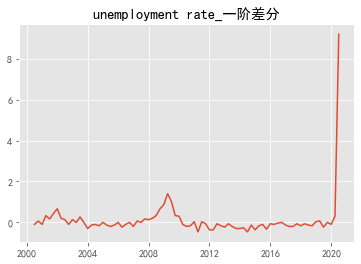

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31     3.826240
2019-03-31     4.036292
2019-06-30     4.322399
2019-09-30     4.646946
2019-12-31     4.990921
2020-03-31     5.344715
2020-06-30     5.703472
2020-09-30     6.064738
2020-12-31     6.427271
2021-03-31     6.790446
2021-06-30     7.153944
2021-09-30     7.517605
2021-12-31     7.881350
2022-03-31     8.245136
2022-06-30     8.608944
2022-09-30     8.972762
2022-12-31     9.336585
2023-03-31     9.700412
2023-06-30    10.064239
2023-09-30    10.428068
2023-12-31    10.791896
2024-03-31    11.155725
2024-06-30    11.519554
2024-09-30    11.883383
2024-12-31    12.247212
Freq: Q-DEC, dtype: float64


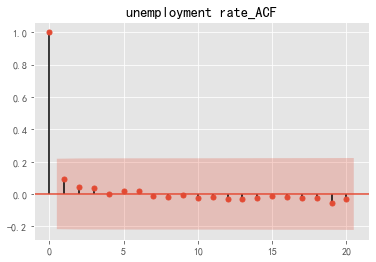

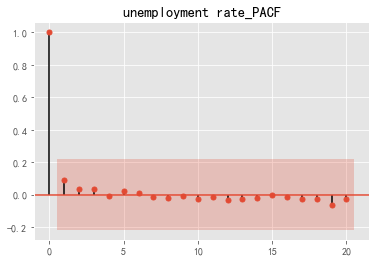

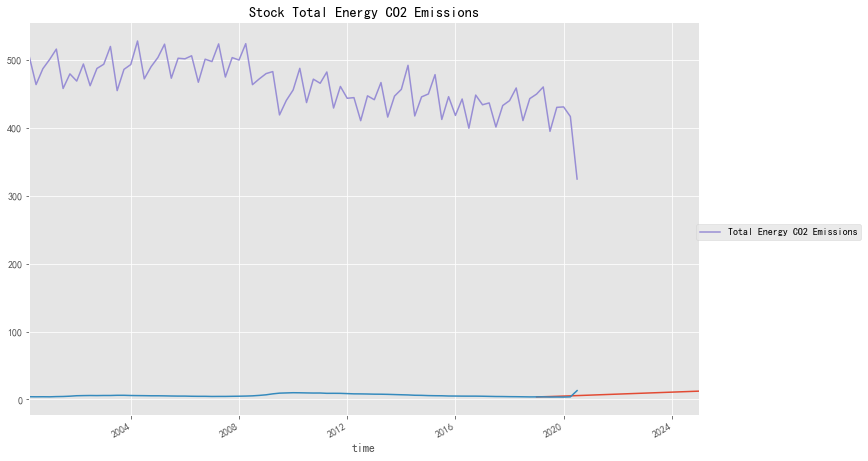

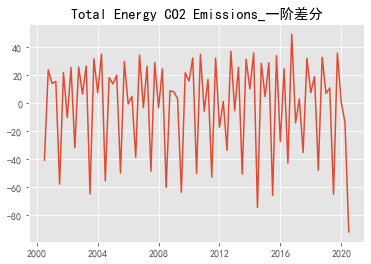

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2018-12-31    415.869639
2019-03-31    439.039883
2019-06-30    412.049855
2019-09-30    435.220099
2019-12-31    408.230071
2020-03-31    431.400315
2020-06-30    404.410288
2020-09-30    427.580531
2020-12-31    400.590504
2021-03-31    423.760747
2021-06-30    396.770720
2021-09-30    419.940963
2021-12-31    392.950937
2022-03-31    416.121179
2022-06-30    389.131153
2022-09-30    412.301395
2022-12-31    385.311369
2023-03-31    408.481611
2023-06-30    381.491586
2023-09-30    404.661828
2023-12-31    377.671802
2024-03-31    400.842044
2024-06-30    373.852018
2024-09-30    397.022260
2024-12-31    370.032235
Freq: Q-DEC, dtype: float64


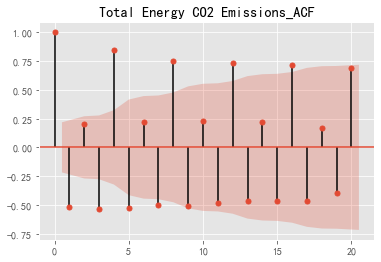

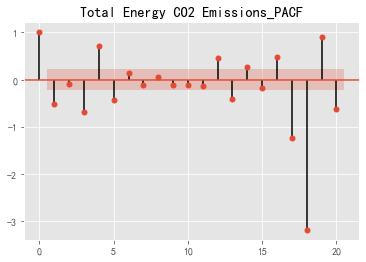

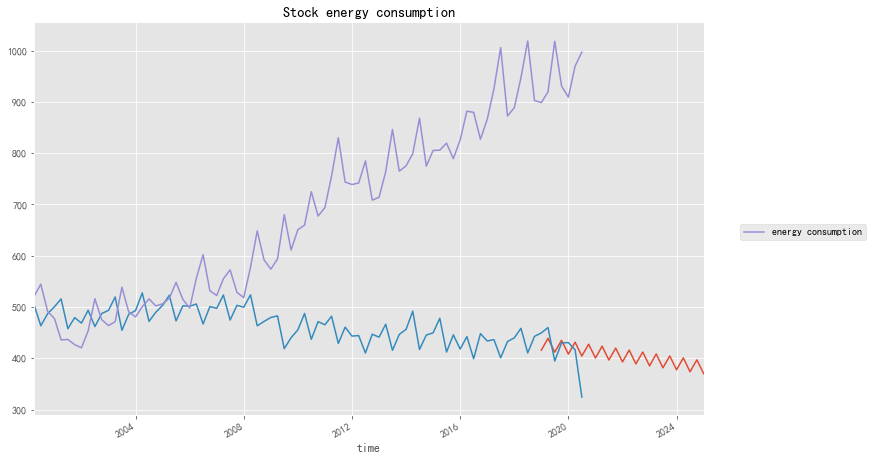

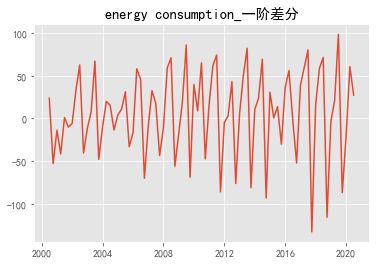

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31     936.104655
2019-03-31     948.923699
2019-06-30     956.800375
2019-09-30     963.499577
2019-12-31     969.918257
2020-03-31     976.270106
2020-06-30     982.606032
2020-09-30     988.938166
2020-12-31     995.269395
2021-03-31    1001.600409
2021-06-30    1007.931372
2021-09-30    1014.262323
2021-12-31    1020.593271
2022-03-31    1026.924218
2022-06-30    1033.255165
2022-09-30    1039.586112
2022-12-31    1045.917059
2023-03-31    1052.248006
2023-06-30    1058.578953
2023-09-30    1064.909900
2023-12-31    1071.240847
2024-03-31    1077.571793
2024-06-30    1083.902740
2024-09-30    1090.233687
2024-12-31    1096.564634
Freq: Q-DEC, dtype: float64


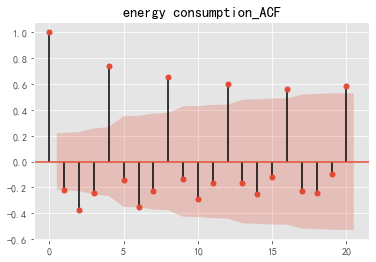

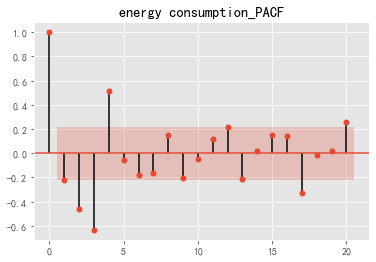

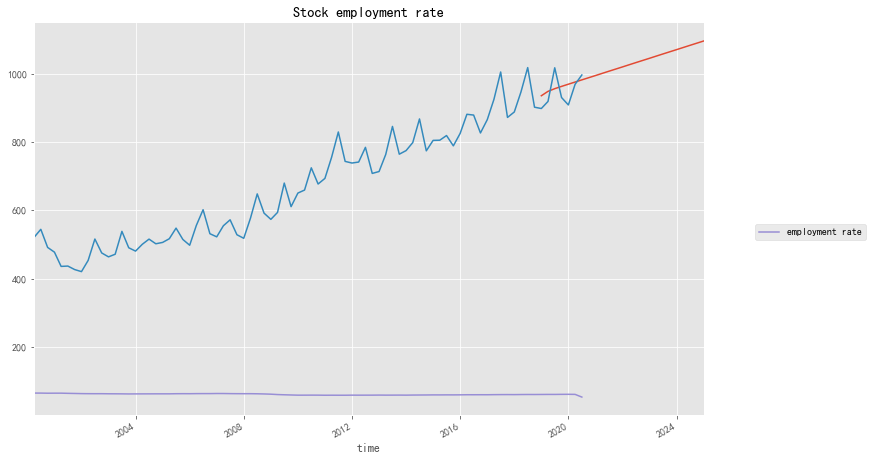

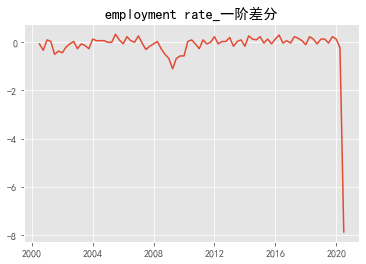

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    60.221505
2019-03-31    59.983648
2019-06-30    59.714237
2019-09-30    59.428054
2019-12-31    59.132957
2020-03-31    58.833121
2020-06-30    58.530767
2020-09-30    58.227074
2020-12-31    57.922669
2021-03-31    57.617886
2021-06-30    57.312902
2021-09-30    57.007811
2021-12-31    56.702664
2022-03-31    56.397486
2022-06-30    56.092292
2022-09-30    55.787090
2022-12-31    55.481883
2023-03-31    55.176674
2023-06-30    54.871463
2023-09-30    54.566252
2023-12-31    54.261041
2024-03-31    53.955829
2024-06-30    53.650617
2024-09-30    53.345405
2024-12-31    53.040193
Freq: Q-DEC, dtype: float64


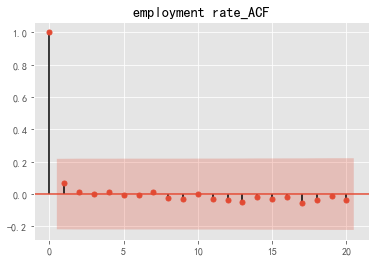

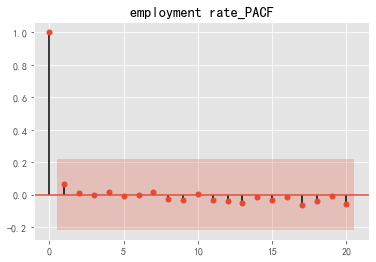

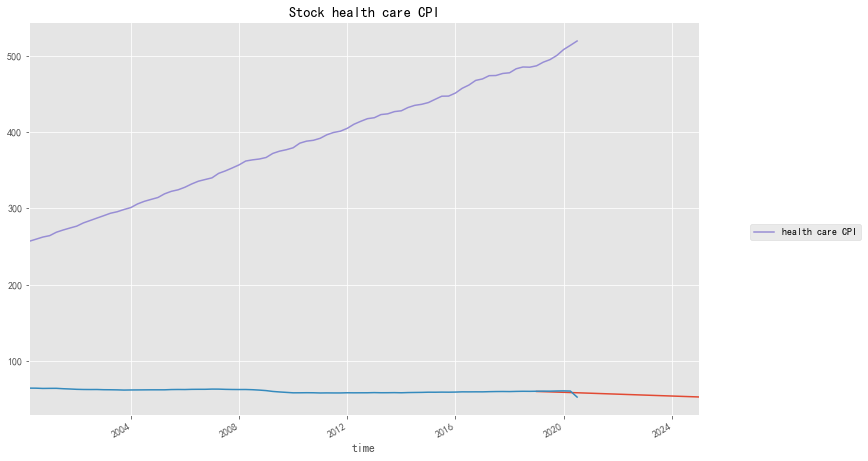

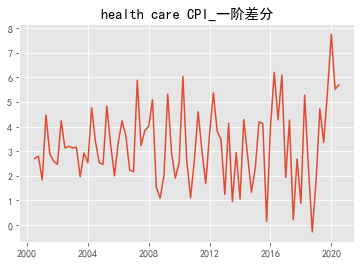

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    487.575948
2019-03-31    490.826171
2019-06-30    494.064013
2019-09-30    497.302276
2019-12-31    500.540525
2020-03-31    503.778774
2020-06-30    507.017024
2020-09-30    510.255273
2020-12-31    513.493523
2021-03-31    516.731772
2021-06-30    519.970021
2021-09-30    523.208271
2021-12-31    526.446520
2022-03-31    529.684769
2022-06-30    532.923019
2022-09-30    536.161268
2022-12-31    539.399517
2023-03-31    542.637767
2023-06-30    545.876016
2023-09-30    549.114265
2023-12-31    552.352515
2024-03-31    555.590764
2024-06-30    558.829013
2024-09-30    562.067263
2024-12-31    565.305512
Freq: Q-DEC, dtype: float64


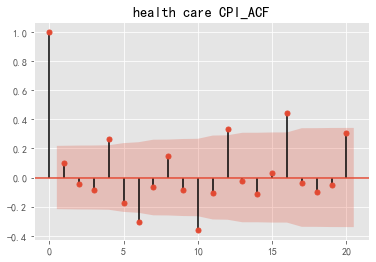

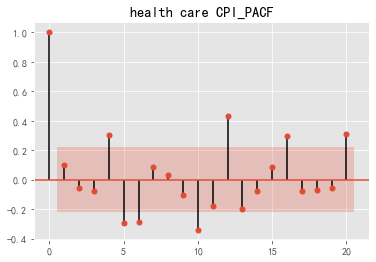

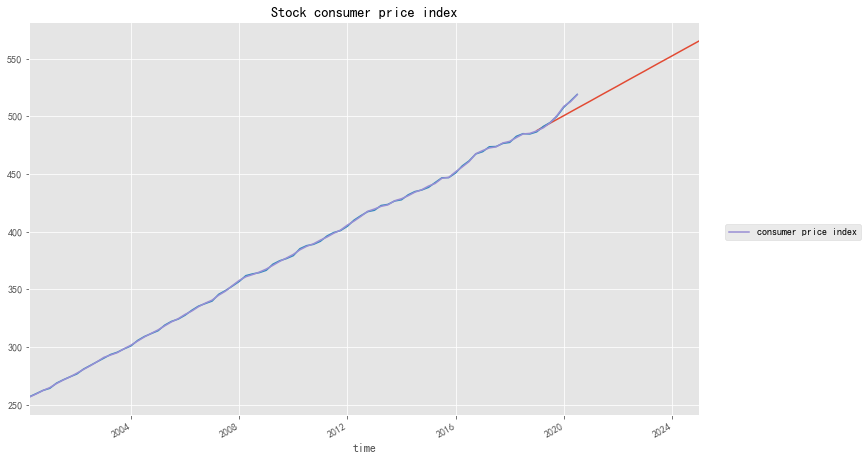

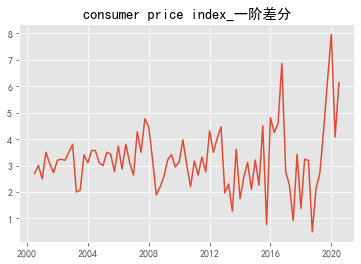

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    487.633829
2019-03-31    490.403104
2019-06-30    493.375756
2019-09-30    496.467911
2019-12-31    499.630287
2020-03-31    502.833924
2020-06-30    506.061807
2020-09-30    509.303936
2020-12-31    512.554437
2021-03-31    515.809856
2021-06-30    519.068166
2021-09-30    522.328175
2021-12-31    525.589181
2022-03-31    528.850774
2022-06-30    532.112711
2022-09-30    535.374851
2022-12-31    538.637110
2023-03-31    541.899438
2023-06-30    545.161808
2023-09-30    548.424202
2023-12-31    551.686610
2024-03-31    554.949026
2024-06-30    558.211448
2024-09-30    561.473872
2024-12-31    564.736298
Freq: Q-DEC, dtype: float64


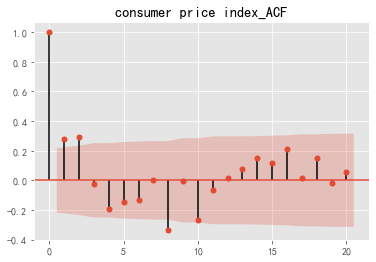

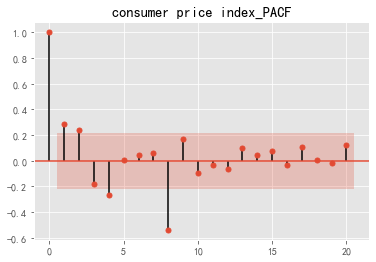

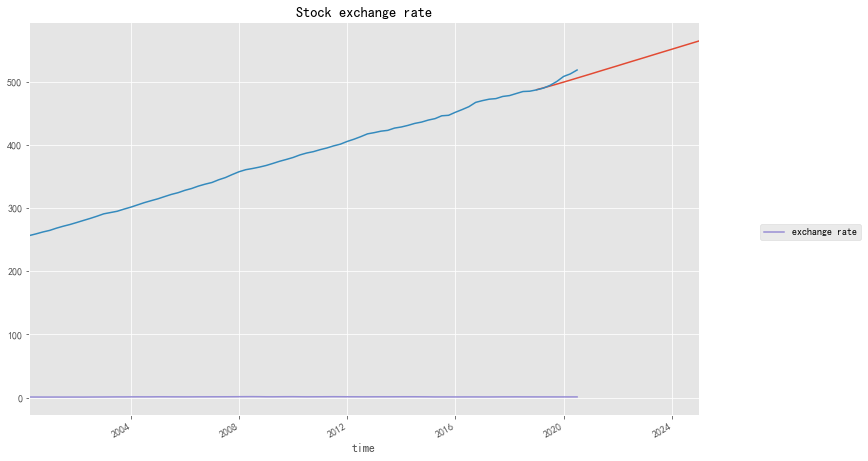

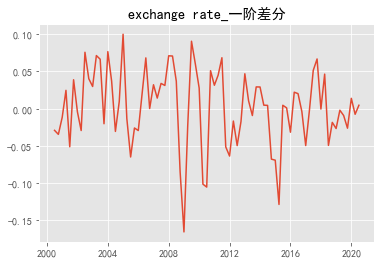

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    1.177014
2019-03-31    1.177122
2019-06-30    1.179104
2019-09-30    1.180826
2019-12-31    1.182584
2020-03-31    1.184338
2020-06-30    1.186092
2020-09-30    1.187846
2020-12-31    1.189600
2021-03-31    1.191354
2021-06-30    1.193108
2021-09-30    1.194862
2021-12-31    1.196616
2022-03-31    1.198370
2022-06-30    1.200124
2022-09-30    1.201878
2022-12-31    1.203632
2023-03-31    1.205386
2023-06-30    1.207139
2023-09-30    1.208893
2023-12-31    1.210647
2024-03-31    1.212401
2024-06-30    1.214155
2024-09-30    1.215909
2024-12-31    1.217663
Freq: Q-DEC, dtype: float64


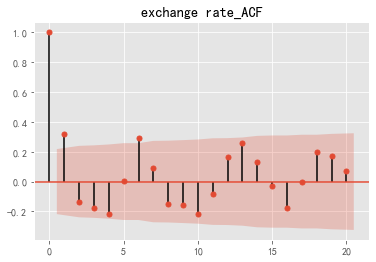

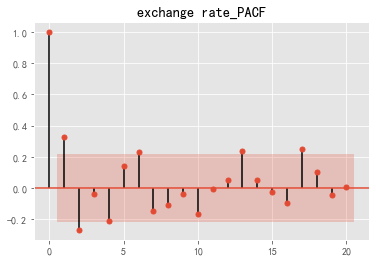

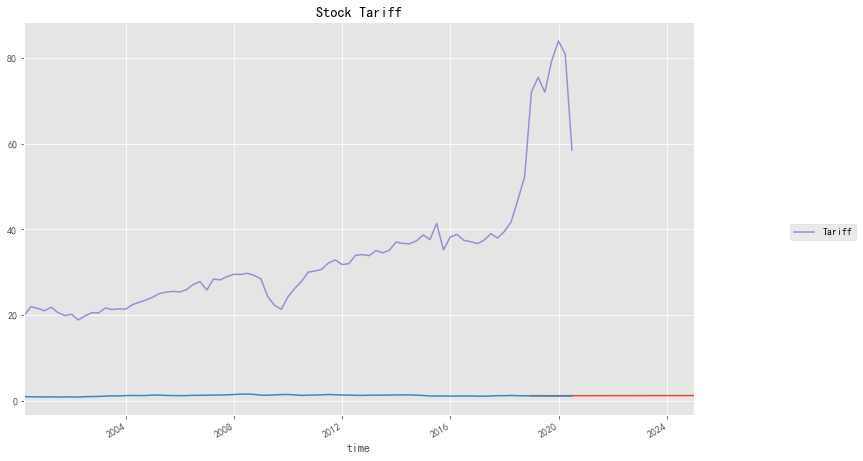

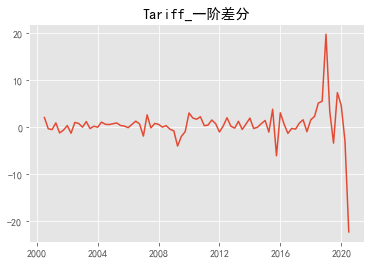

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    53.988985
2019-03-31    54.395523
2019-06-30    54.788458
2019-09-30    55.181243
2019-12-31    55.574027
2020-03-31    55.966810
2020-06-30    56.359594
2020-09-30    56.752377
2020-12-31    57.145161
2021-03-31    57.537944
2021-06-30    57.930728
2021-09-30    58.323511
2021-12-31    58.716295
2022-03-31    59.109078
2022-06-30    59.501862
2022-09-30    59.894646
2022-12-31    60.287429
2023-03-31    60.680213
2023-06-30    61.072996
2023-09-30    61.465780
2023-12-31    61.858563
2024-03-31    62.251347
2024-06-30    62.644130
2024-09-30    63.036914
2024-12-31    63.429698
Freq: Q-DEC, dtype: float64


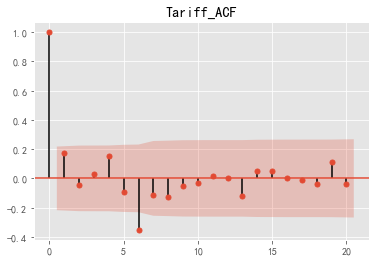

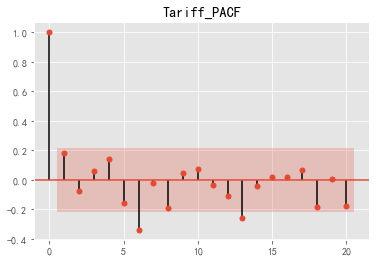

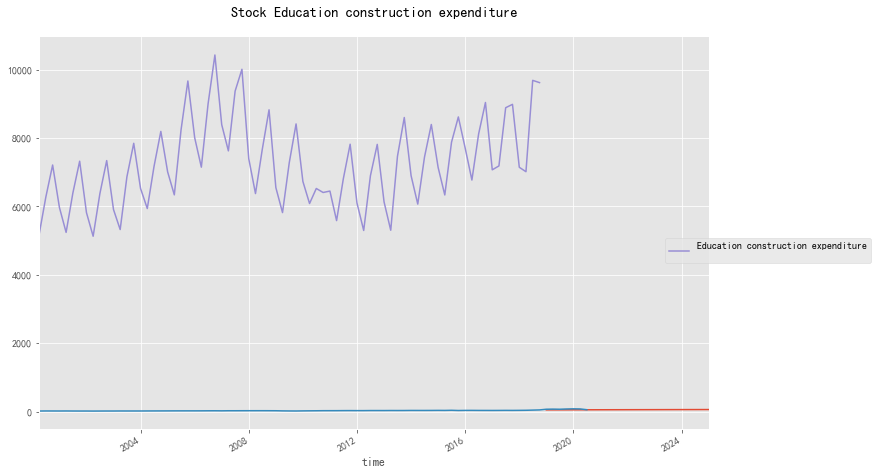

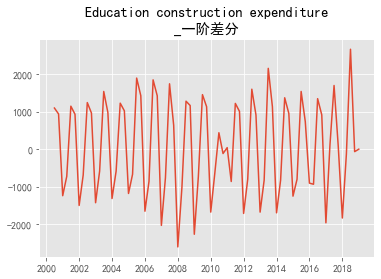

d:\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-09-30    8672.031831
2018-12-31    8482.278399
2019-03-31    8471.379498
2019-06-30    8499.339162
2019-09-30    8535.741374
2019-12-31    8573.977844
2020-03-31    8612.612832
2020-06-30    8651.334402
2020-09-30    8690.074784
2020-12-31    8728.819254
2021-03-31    8767.564611
2021-06-30    8806.310161
2021-09-30    8845.055752
2021-12-31    8883.801353
2022-03-31    8922.546956
2022-06-30    8961.292560
2022-09-30    9000.038163
2022-12-31    9038.783767
2023-03-31    9077.529370
2023-06-30    9116.274974
2023-09-30    9155.020578
2023-12-31    9193.766181
2024-03-31    9232.511785
2024-06-30    9271.257388
2024-09-30    9310.002992
2024-12-31    9348.748595
Freq: Q-DEC, dtype: float64


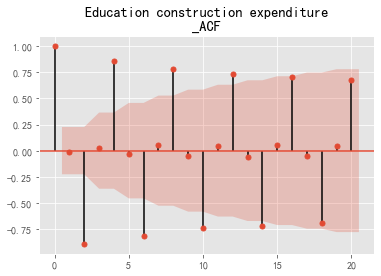

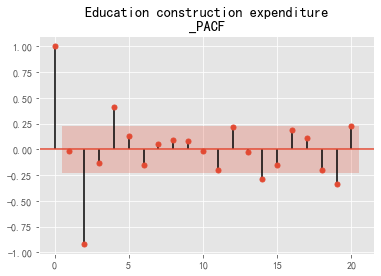

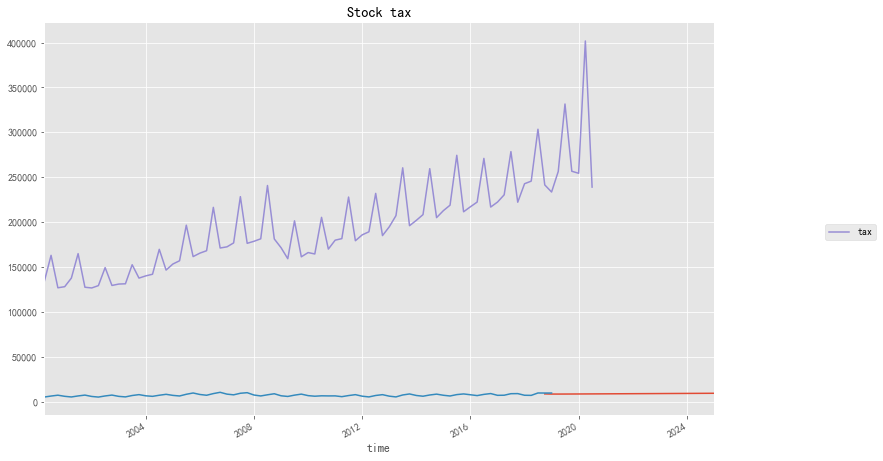

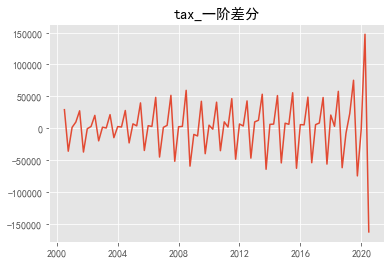

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    262915.968291
2019-03-31    259799.729054
2019-06-30    263033.453214
2019-09-30    264628.017450
2019-12-31    266645.709362
2020-03-31    268554.176404
2020-06-30    270490.838416
2020-09-30    272420.222265
2020-12-31    274351.484877
2021-03-31    276282.262511
2021-06-30    278213.165336
2021-09-30    280144.035845
2021-12-31    282074.914695
2022-03-31    284005.791392
2022-06-30    285936.668645
2022-09-30    287867.545755
2022-12-31    289798.422901
2023-03-31    291729.300038
2023-06-30    293660.177178
2023-09-30    295591.054316
2023-12-31    297521.931455
2024-03-31    299452.808594
2024-06-30    301383.685733
2024-09-30    303314.562872
2024-12-31    305245.440011
Freq: Q-DEC, dtype: float64


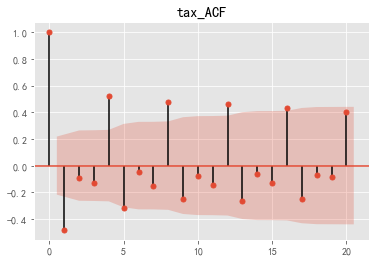

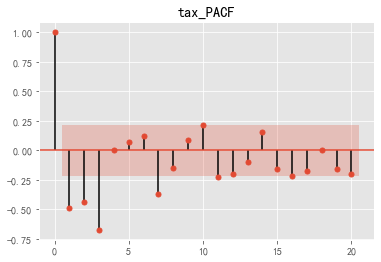

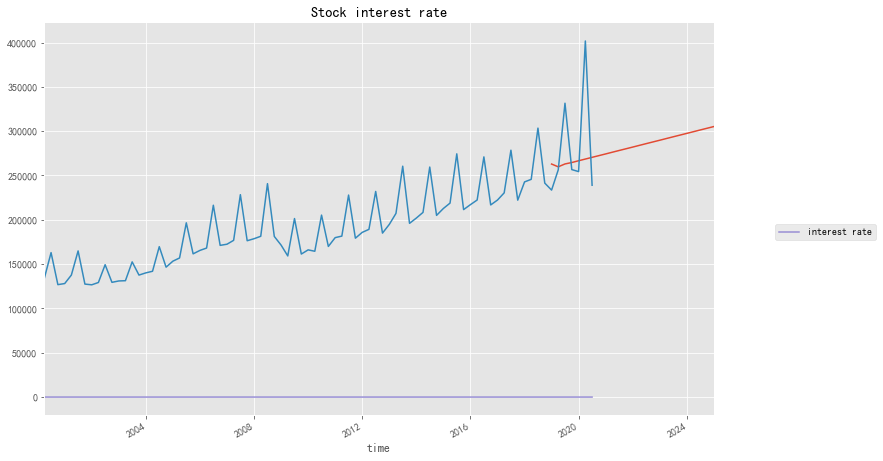

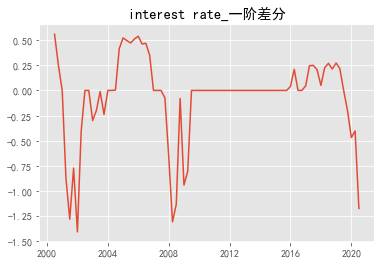

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    5.142628
2019-03-31    5.214659
2019-06-30    5.243126
2019-09-30    5.240276
2019-12-31    5.214911
2020-03-31    5.173359
2020-06-30    5.120172
2020-09-30    5.058619
2020-12-31    4.991052
2021-03-31    4.919162
2021-06-30    4.844163
2021-09-30    4.766930
2021-12-31    4.688091
2022-03-31    4.608097
2022-06-30    4.527273
2022-09-30    4.445851
2022-12-31    4.364001
2023-03-31    4.281842
2023-06-30    4.199462
2023-09-30    4.116922
2023-12-31    4.034267
2024-03-31    3.951530
2024-06-30    3.868734
2024-09-30    3.785895
2024-12-31    3.703025
Freq: Q-DEC, dtype: float64


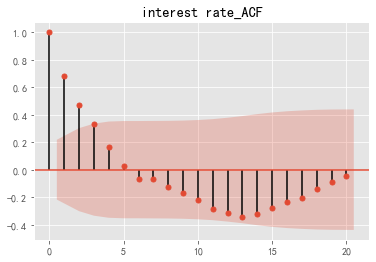

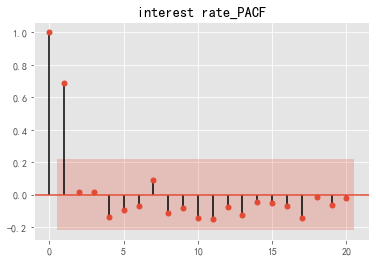

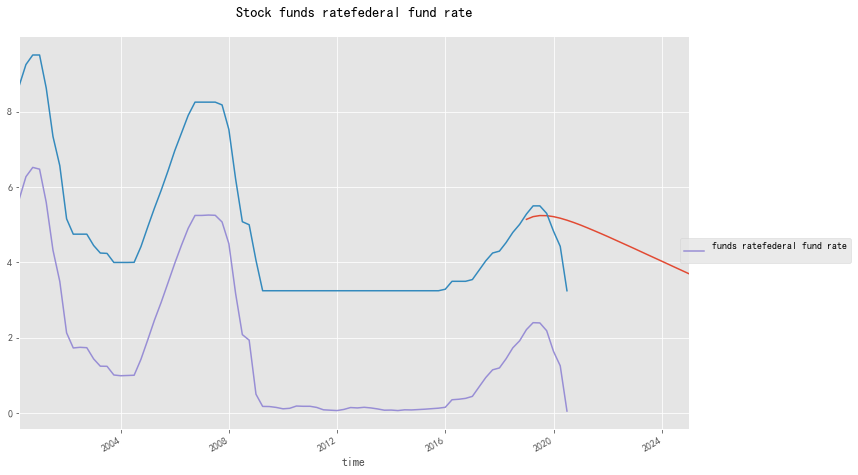

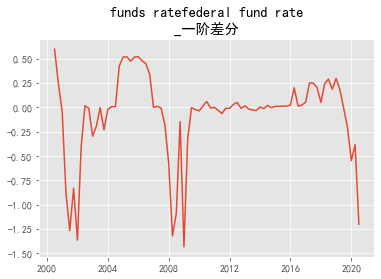

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    2.049328
2019-03-31    2.127893
2019-06-30    2.169675
2019-09-30    2.182929
2019-12-31    2.174059
2020-03-31    2.148031
2020-06-30    2.108697
2020-09-30    2.059043
2020-12-31    2.001385
2021-03-31    1.937521
2021-06-30    1.868843
2021-09-30    1.796432
2021-12-31    1.721125
2022-03-31    1.643573
2022-06-30    1.564280
2022-09-30    1.483637
2022-12-31    1.401946
2023-03-31    1.319442
2023-06-30    1.236309
2023-09-30    1.152687
2023-12-31    1.068687
2024-03-31    0.984392
2024-06-30    0.899870
2024-09-30    0.815171
2024-12-31    0.730335
Freq: Q-DEC, dtype: float64


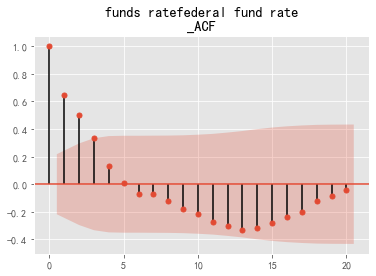

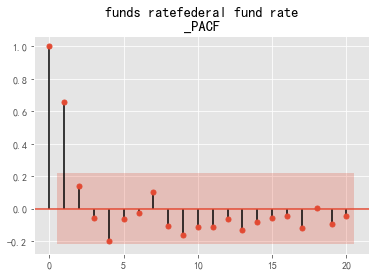

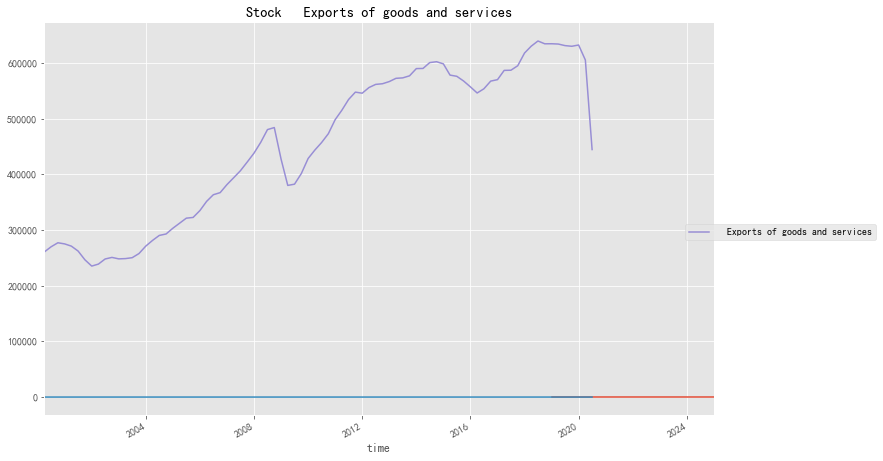

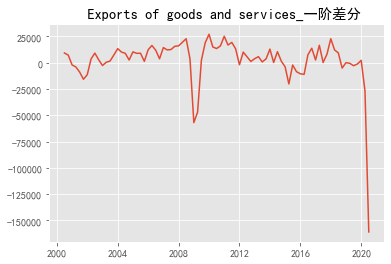

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    623475.138354
2019-03-31    614951.894505
2019-06-30    608119.795565
2019-09-30    602375.709916
2019-12-31    597331.607409
2020-03-31    592737.845352
2020-06-30    588433.813877
2020-09-30    584316.183177
2020-12-31    580318.475094
2021-03-31    576397.920305
2021-06-30    572527.002782
2021-09-30    568688.019840
2021-12-31    564869.582299
2022-03-31    561064.362826
2022-06-30    557267.647316
2022-09-30    553476.402907
2022-12-31    549688.678381
2023-03-31    545903.218402
2023-06-30    542119.215340
2023-09-30    538336.149600
2023-12-31    534553.686893
2024-03-31    530771.612153
2024-06-30    526989.787016
2024-09-30    523208.122462
2024-12-31    519426.561221
Freq: Q-DEC, dtype: float64


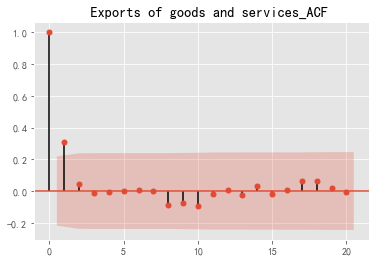

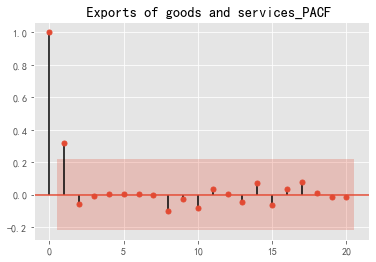

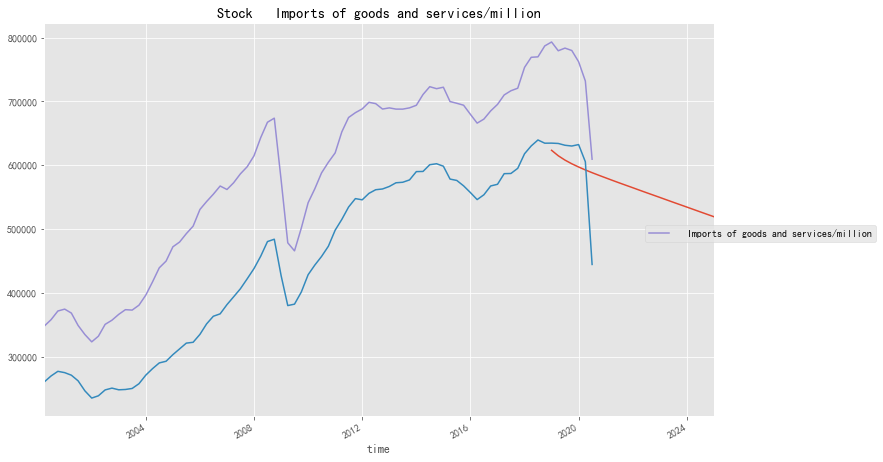

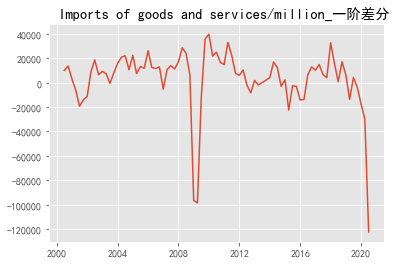

d:\python\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\python\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2018-12-31    803158.677103
2019-03-31    810135.980205
2019-06-30    813552.745930
2019-09-30    815583.602824
2019-12-31    817075.006515
2020-03-31    818356.432645
2020-06-30    819556.126798
2020-09-30    820724.007476
2020-12-31    821879.505030
2021-03-31    823030.182558
2021-06-30    824178.983932
2021-09-30    825327.055029
2021-12-31    826474.841872
2022-03-31    827622.518072
2022-06-30    828770.151205
2022-09-30    829917.767574
2022-12-31    831065.377418
2023-03-31    832212.984723
2023-06-30    833360.591038
2023-09-30    834508.196969
2023-12-31    835655.802751
2024-03-31    836803.408474
2024-06-30    837951.014174
2024-09-30    839098.619865
2024-12-31    840246.225553
Freq: Q-DEC, dtype: float64


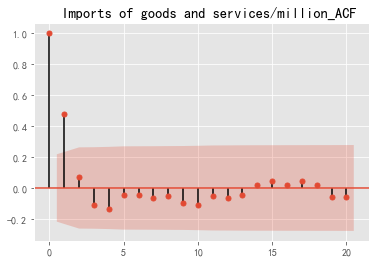

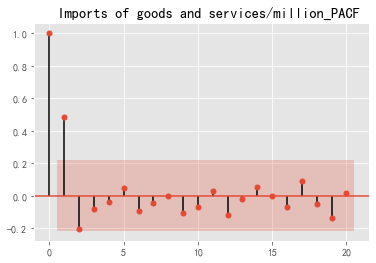

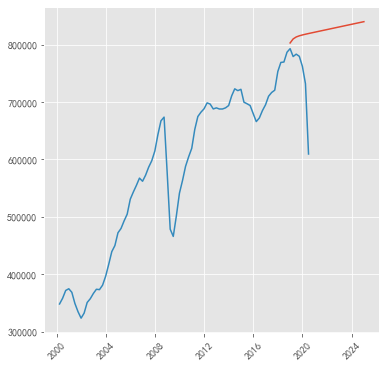

In [13]:
# 操作后面的十几个变量
f = open('处理后csv文件.csv',mode='r',encoding='utf-8')
csv_reader = csv.reader(f)
rows = [i for i in csv_reader]
headers = rows[0]

# 开始循环操作
for name in headers[1:]:
    if name == 'Education construction expenditure\n':
        stock_week = stock['{}'.format(name)].resample('Q').mean()
        stock_train = stock_week['2000-02':'2018-12']

        stock_train.plot(figsize=(12,8))
        plt.legend(bbox_to_anchor=(1.25, 0.5))
        plt.title("Stock {}".format(name))
        sns.despine()
        stock_week
        stock_train = stock_train.fillna(method='ffill')
        stock_diff = stock_train.diff()
        stock_diff = stock_diff.dropna()
        plt.figure()
        plt.plot(stock_diff)
        plt.title('{}_一阶差分'.format(name))
        plt.show()

        acf = plot_acf(stock_diff, lags=20)
        plt.title("{}_ACF".format(name))
        acf.show()

        pacf = plot_pacf(stock_diff, lags=20)
        plt.title("{}_PACF".format(name))
        pacf.show()

        # 根据上图选择p、d、q指标
        model = ARIMA(stock_train, order=(1, 1, 1),freq='Q')
        result = model.fit()
        #print(result.summary())#统计出ARIMA模型的指标
        pred = result.predict('2018-09','2024-12',dynamic=True, typ='levels')#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
        print(pred)

        plt.figure(figsize=(6, 6))
        plt.xticks(rotation=45)
        plt.plot(pred)
        plt.plot(stock_train)#[<matplotlib.lines.Line2D at 0x28025665278>]
    else:
        stock_week = stock['{}'.format(name)].resample('Q').mean()
        stock_train = stock_week['2000-02':'2020-08']

        stock_train.plot(figsize=(12,8))
        plt.legend(bbox_to_anchor=(1.25, 0.5))
        plt.title("Stock {}".format(name))
        sns.despine()
        stock_week

        stock_diff = stock_train.diff()
        stock_diff = stock_diff.dropna()
        plt.figure()
        plt.plot(stock_diff)
        plt.title('{}_一阶差分'.format(name))
        plt.show()

        acf = plot_acf(stock_diff, lags=20)
        plt.title("{}_ACF".format(name))
        acf.show()

        pacf = plot_pacf(stock_diff, lags=20)
        plt.title("{}_PACF".format(name))
        pacf.show()

        # 根据上图选择p、d、q指标
        model = ARIMA(stock_train, order=(1, 1, 1),freq='Q')
        result = model.fit()
        #print(result.summary())#统计出ARIMA模型的指标
        pred = result.predict('2018-12','2024-12',dynamic=True, typ='levels')#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
        print(pred)

        plt.figure(figsize=(6, 6))
        plt.xticks(rotation=45)
        plt.plot(pred)
        plt.plot(stock_train)#[<matplotlib.lines.Line2D at 0x28025665278>]